<a href="https://colab.research.google.com/github/Aryamaan777/Iris-Classification/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import pandas as pd
from tensorflow.keras.layers import Input,Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder as le

In [0]:
data=pd.read_csv("/content/IRIS.csv")

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
data["sepal_length"]=data["sepal_length"]-data["sepal_length"].min()
data["sepal_length"]=data["sepal_length"]/data["sepal_length"].max()

data["sepal_width"]=data["sepal_width"]-data["sepal_width"].min()
data["sepal_width"]=data["sepal_width"]/data["sepal_width"].max()

data["petal_length"]=data["petal_length"]-data["petal_length"].min()
data["petal_length"]=data["petal_length"]/data["petal_length"].max()

In [0]:
y=data["species"]
x=data.drop("species",axis=1)

In [7]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [8]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.2
1,0.166667,0.416667,0.067797,0.2
2,0.111111,0.500000,0.050847,0.2
3,0.083333,0.458333,0.084746,0.2
4,0.194444,0.666667,0.067797,0.2


In [0]:
l=le()
y=l.fit_transform(y)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
print(x_train.shape)

(120, 4)


In [0]:
k=len(set(y_test))

In [0]:
i=Input(shape=(4,))
x=Dense(512,activation="relu")(i)
x=Dense(1024,activation="relu")(i)
x=Dense(k,activation="softmax")(x)

model=Model(i,x)

In [0]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [0]:
y_train,y_test=y_train.flatten(),y_test.flatten()

In [16]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=70)

Epoch 1/70
4/4 [==============================] - 0s 43ms/step - loss: 1.0414 - accuracy: 0.3500 - val_loss: 0.9952 - val_accuracy: 0.4667
Epoch 2/70
4/4 [==============================] - 0s 11ms/step - loss: 0.9595 - accuracy: 0.6083 - val_loss: 0.9322 - val_accuracy: 0.5667
Epoch 3/70
4/4 [==============================] - 0s 11ms/step - loss: 0.8955 - accuracy: 0.6500 - val_loss: 0.8820 - val_accuracy: 0.5667
Epoch 4/70
4/4 [==============================] - 0s 10ms/step - loss: 0.8413 - accuracy: 0.6667 - val_loss: 0.8351 - val_accuracy: 0.5667
Epoch 5/70
4/4 [==============================] - 0s 12ms/step - loss: 0.7929 - accuracy: 0.6833 - val_loss: 0.7901 - val_accuracy: 0.5667
Epoch 6/70
4/4 [==============================] - 0s 11ms/step - loss: 0.7438 - accuracy: 0.6917 - val_loss: 0.7464 - val_accuracy: 0.5667
Epoch 7/70
4/4 [==============================] - 0s 11ms/step - loss: 0.6915 - accuracy: 0.6917 - val_loss: 0.7094 - val_accuracy: 0.5667
Epoch 8/70
4/4 [===========

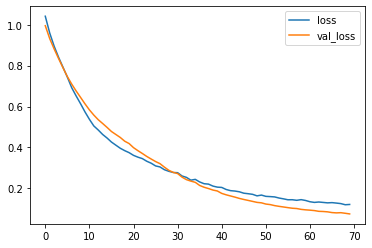

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

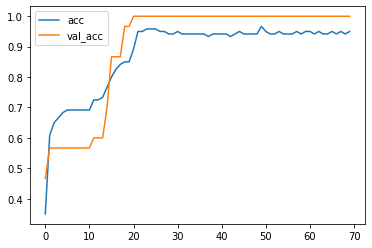

In [18]:
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")
plt.legend()